<a href="https://colab.research.google.com/github/220660121115/UAS_BDA_220660121115_Kemal_Hapidz_Prastiawan_IF-IVA/blob/main/Uas_BDA_Kemal_Hapidz_Prastiawan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from google.colab import files
uploaded = files.upload()

Saving NetflixOriginals.csv to NetflixOriginals (1).csv


In [6]:
import pandas as pd

# Try reading the file with 'latin-1' encoding
data = pd.read_csv('NetflixOriginals.csv', encoding='latin-1')
# If this doesn't work, try other encodings like 'ISO-8859-1'
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [7]:
print(data)

                                           Title                  Genre  \
0                                Enter the Anime            Documentary   
1                                    Dark Forces               Thriller   
2                                        The App  Science fiction/Drama   
3                                 The Open House        Horror thriller   
4                                    Kaali Khuhi                Mystery   
..                                           ...                    ...   
579        Taylor Swift: Reputation Stadium Tour           Concert Film   
580  Winter on Fire: Ukraine's Fight for Freedom            Documentary   
581                      Springsteen on Broadway           One-man show   
582    Emicida: AmarElo - It's All For Yesterday            Documentary   
583     David Attenborough: A Life on Our Planet            Documentary   

              Premiere  Runtime  IMDB Score                  Language  
0       August 5, 2019     

In [8]:
# Memeriksa tipe data setiap kolom
print(data.dtypes)

Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object


In [13]:
# Check if 'explicit' column exists, if not handle it
if 'explicit' not in data.columns:
    # Handle the missing column, either add it or skip the operation
    print("Column 'explicit' not found in the DataFrame.")
    # Example: Adding a dummy column filled with 0
    data['explicit'] = 0
else:
    # Mengonversi kolom 'explicit' ke numerik jika masih dalam format string
    if data['explicit'].dtype == 'object':
        data['explicit'] = data['explicit'].apply(lambda x: 1 if x == 'True' else 0)

# Memilih hanya kolom yang relevan dan memiliki tipe data numerik
selected_columns = ['Title', 'Genre', 'Language']
data_selected = data[selected_columns]

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Assuming 'data' is already loaded as in your provided code

# Memilih hanya kolom yang relevan dan memiliki tipe data numerik
selected_columns = ['Title', 'Genre', 'Language']
data_selected = data[selected_columns]

# One-hot encode categorical features
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data_selected[['Title', 'Genre', 'Language']])

# Standarisasi data (if needed for other numerical features, not shown in this example)
# scaler = StandardScaler()
# numerical_features = ...  # Select numerical columns if any
# data_scaled = scaler.fit_transform(data[numerical_features])

In [19]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# Assuming 'data_selected' is already loaded as in your provided code

# One-hot encode categorical features
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data_selected[['Title', 'Genre', 'Language']]).toarray() # Convert to a NumPy array

# Menentukan jumlah klaster optimal menggunakan metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    # Fit KMeans on the encoded numerical data
    kmeans.fit(encoded_data)
    wcss.append(kmeans.inertia_)

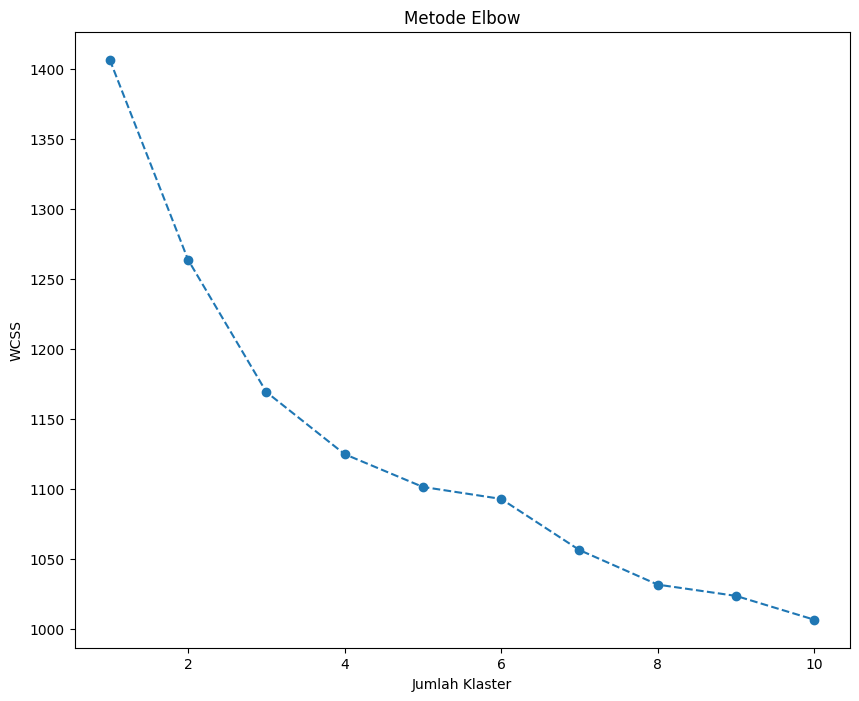

In [20]:
# Plotting metode Elbow
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Klaster')
plt.ylabel('WCSS')
plt.show()

In [22]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# Assuming 'data_selected' is already loaded as in your provided code

# One-hot encode categorical features
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data_selected[['Title', 'Genre', 'Language']]).toarray() # Convert to a NumPy array

# Menentukan jumlah klaster optimal menggunakan metode Elbow
# ... (Your existing Elbow method code)

# Langkah 3: Clustering dan Visualisasi
# Melakukan clustering dengan jumlah klaster optimal (misalnya 4 berdasarkan Elbow method)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
# Fit KMeans on the encoded data, not data_scaled
clusters = kmeans.fit_predict(encoded_data)

# Menambahkan hasil clustering ke dalam data asli
data['Cluster'] = clusters

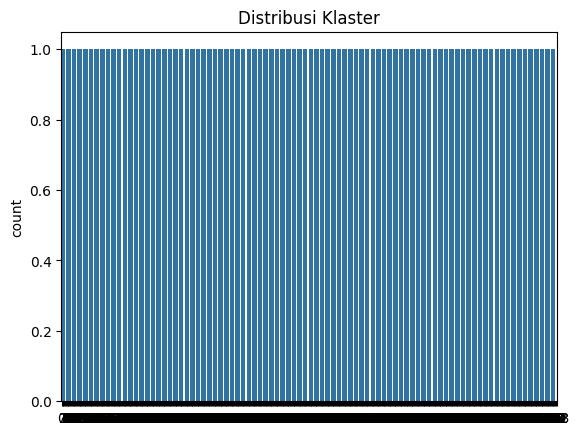

In [23]:
# Melihat distribusi klaster
sns.countplot(data['Cluster'])
plt.title('Distribusi Klaster')
plt.show()

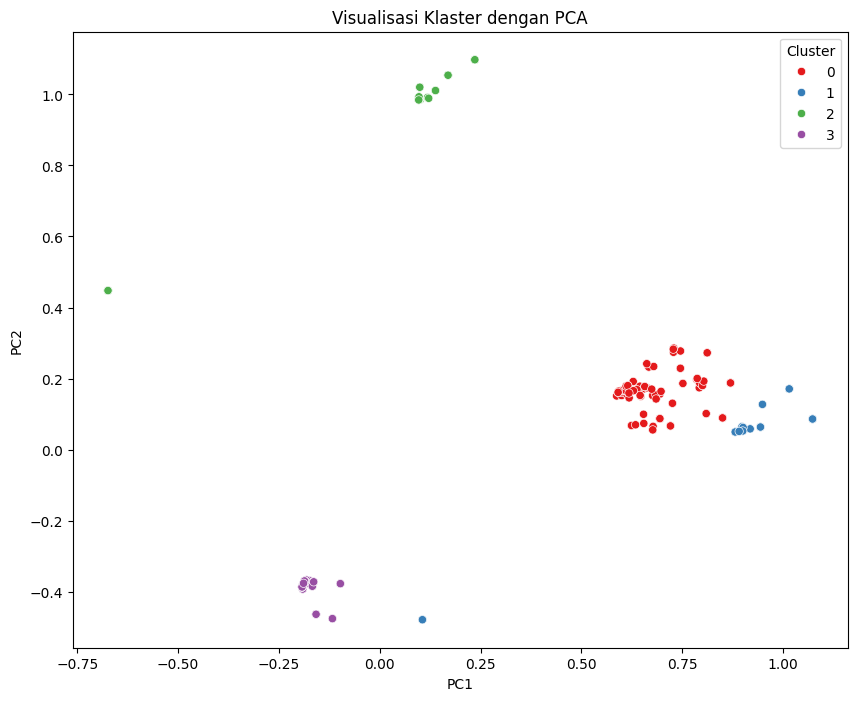

In [27]:
# Visualisasi 2D dengan PCA (jika diperlukan)
from sklearn.decomposition import PCA # Import the PCA class
pca = PCA(n_components=2)
principal_components = pca.fit_transform(encoded_data)
data_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
data_pca['Cluster'] = clusters

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data_pca, palette='Set1')
plt.title('Visualisasi Klaster dengan PCA')
plt.show()

In [36]:
def recommend_film(identifier, data, num_recommendations=None, search_by='Title'):
    # Pencarian berdasarkan Title, Genre, atau Language
    if search_by == 'Title':
        # Menemukan data dari Title yang diberikan
        filtered_data = data[data['Title'] == identifier]
        if filtered_data.empty:
            return f"Tittle '{identifier}' tidak ditemukan dalam data."
    elif search_by == 'Genre':
        # Menemukan data dari Genre yang diberikan
        filtered_data = data[data['Genre'] == identifier]
        if filtered_data.empty:
            return f"genre '{identifier}' tidak ditemukan dalam data."
    elif search_by == 'Language':
        # Menemukan data dari Language yang diberikan
        filtered_data = data[data['Language'] == identifier]
        if filtered_data.empty:
            return f"Bahasa '{identifier}' tidak ditemukan dalam data."
    else:
        return "Parameter 'search_by' harus 'Title', 'Genre', atau 'Language'."

    # Jika num_recommendations tidak ditentukan, tampilkan semua data yang sesuai
    if num_recommendations is None or num_recommendations > len(filtered_data):
        # Return only the available columns
        return filtered_data[['Title', 'Genre', 'Language']]  # Removed 'Director'

    # Mengambil beberapa rekomendasi musik dari filter (Title, Genre, atau Language)
    recommendations = filtered_data.sample(num_recommendations)

    # Return only the available columns
    return recommendations[['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language']] # Removed 'Director'


In [37]:
# Langkah 5: Penggunaan Fungsi Rekomendasi
# Penggunaan fungsi rekomendasi berdasarkan Title
identifier = 'Kaali Khuhi'  # Ganti dengan nama Title yang ada dalam data
search_by = 'Title'
recommendations = recommend_film(identifier, data, search_by=search_by)
print(recommendations)

         Title    Genre Language
4  Kaali Khuhi  Mystery    Hindi


In [39]:
# Contoh penggunaan untuk Genre
identifier = 'Horror thriller'
search_by = 'Genre'
recommendations = recommend_film(identifier, data, search_by=search_by)
print(recommendations)

              Title            Genre Language
3    The Open House  Horror thriller  English
19       Death Note  Horror thriller  English
331   Gerald's Game  Horror thriller  English


In [40]:
# Contoh penggunaan untuk Language
identifier = 'Spanish'
search_by = 'Language'
recommendations = recommend_film(identifier, data, search_by=search_by)
print(recommendations)

                                             Title  \
1                                      Dark Forces   
15                                  After the Raid   
53                             The Day of the Lord   
88                                       Intuition   
92        Who Would You Take to a Deserted Island?   
96                              Despite Everything   
137                                  The Paramedic   
144                                     Dad Wanted   
190                                You've Got This   
242                                Unknown Origins   
246                                     Below Zero   
254                          Offering to the Storm   
276                               Notes for My Son   
296                           Como Caído del Cielo   
313                                   The Occupant   
338                          Nobody Knows I'm Here   
349                                Crazy About Her   
350                         

In [41]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [42]:
output_file_path = '/content/drive/My Drive/path_to_output_file/NetflixOriginals_Hasil.csv'

In [44]:
data.to_csv(output_file_path, index=False)

In [45]:
print(f"Dataframe telah disimpan ke: {output_file_path}")

Dataframe telah disimpan ke: /content/drive/My Drive/path_to_output_file/NetflixOriginals_Hasil.csv
